In [268]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from sampleDiscrete import sampleDiscrete

from bmm import BMM

In [269]:
np.random.seed(1)
# load data
data = sio.loadmat('kos_doc_data.mat')
A = np.array(data['A'])
B = data['B']
V = data['V']

# Exercise A

In [270]:
W = np.max([np.max(A[:, 1]), np.max(B[:, 1])])  # total number of unique words
D = np.max(A[:, 0])  # number of documents in A

word_counts = np.zeros(W)
# Populate the count matrices by looping over documents
for d in range(D):
    training_documents = np.where(A[:, 0] == d+1)  # get all occurrences of document d in the training data
    w = np.array(A[training_documents, 1])  # number of unique words in document d
    c = np.array(A[training_documents, 2])  # counts of words in document d
    word_counts[w-1] += c  # number of times w is assigned to component k

In [271]:
no_words = np.sum(word_counts).astype(int)
word_freq = word_counts / no_words

In [272]:
top_20_ids = np.argsort(word_freq)[-20:]
top_20_freq = word_freq[top_20_ids]
top_20_words = [word[0] for word in V[top_20_ids, 0]]

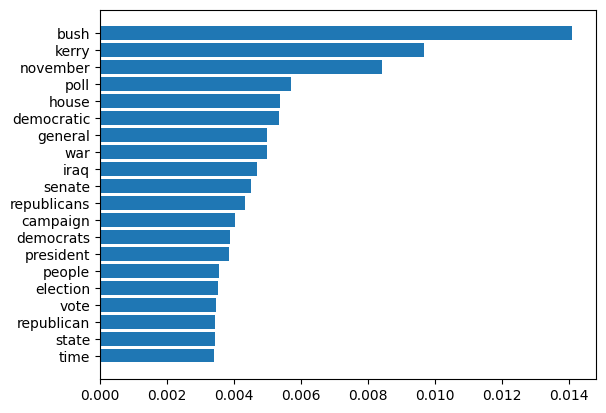

In [273]:
plt.barh(top_20_words, top_20_freq)
plt.show()

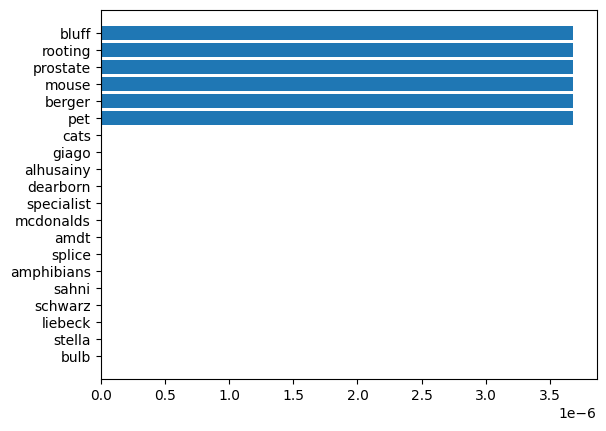

In [274]:
bot_20_ids = np.argsort(word_freq)[:20]
bot_20_freq = word_freq[bot_20_ids]
bot_20_words = [word[0] for word in V[bot_20_ids, 0]]
plt.barh(bot_20_words, bot_20_freq)
plt.show()

# Exercise B

In [275]:
alpha = 1
pseudo_word_count = alpha * np.ones(W)
print(f'Total pseudo-words added = {np.sum(pseudo_word_count)}')

Total pseudo-words added = 6906.0


In [276]:
posterior_word_counts = word_counts + pseudo_word_count

In [277]:
posterior_no_words = np.sum(posterior_word_counts).astype(int)
posterior_word_freq = posterior_word_counts / np.sum(posterior_word_counts)

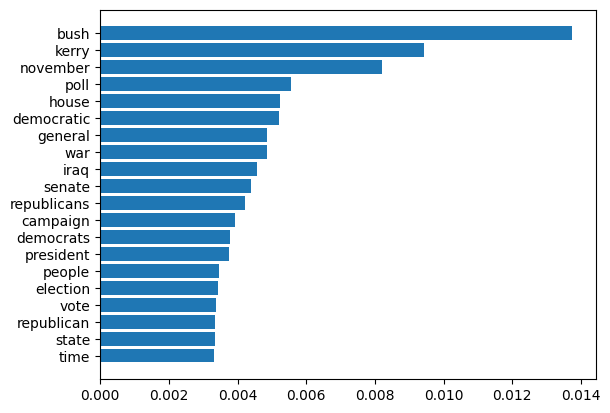

In [278]:
top_20_ids = np.argsort(posterior_word_freq)[-20:]
top_20_freq = posterior_word_freq[top_20_ids]
top_20_words = [word[0] for word in V[top_20_ids, 0]]
plt.barh(top_20_words, top_20_freq)
plt.show()

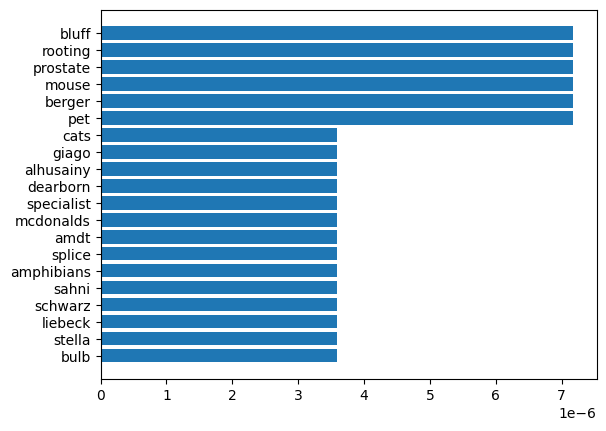

In [279]:
bot_20_ids = np.argsort(posterior_word_freq)[:20]
bot_20_freq = posterior_word_freq[bot_20_ids]
bot_20_words = [word[0] for word in V[bot_20_ids, 0]]
plt.barh(bot_20_words, bot_20_freq)
plt.show()

# Exercise C

In [280]:
word_counts = np.zeros(W)
# Populate the count matrices by looping over documents
test_documents = np.where(B[:, 0] == 2001)  # get all occurrences of document d in the training data
w = np.array(B[test_documents, 1])  # number of unique words in document d
c = np.array(B[test_documents, 2])  # counts of words in document d
word_counts[w-1] += c  # number of times w is assigned to component k

In [281]:
log_prob = np.dot(word_counts, np.log(posterior_word_freq))
print(f'Log Probability of Test 2001 = {log_prob}')

Log Probability of Test 2001 = -3688.6211698172992


In [282]:
perplexity = np.exp(-log_prob / np.sum(word_counts))
print(f'Per-word Perplexity across Test 2001= {perplexity}')

Per-word Perplexity across Test 2001= 4373.110988104844


In [283]:
W = np.max([np.max(A[:, 1]), np.max(B[:, 1])])  # total number of unique words
D = np.max(B[:, 0])  # number of documents in A

word_counts = np.zeros(W)
# Populate the count matrices by looping over documents
for d in range(D):
    training_documents = np.where(B[:, 0] == d+1)  # get all occurrences of document d in the training data
    w = np.array(B[training_documents, 1])  # number of unique words in document d
    c = np.array(B[training_documents, 2])  # counts of words in document d
    word_counts[w-1] += c  # number of times w is assigned to component k
no_words = np.sum(word_counts).astype(int)

In [284]:
log_prob = np.dot(word_counts, np.log(posterior_word_freq))
print(f'Log Probability of Test 2001 = {log_prob}')
perplexity = np.exp(-log_prob / no_words)
print(f'Per-word Perplexity across Test 2001= {perplexity}')

Log Probability of Test 2001 = -1545978.5917629278
Per-word Perplexity across Test 2001= 2683.9840703508576


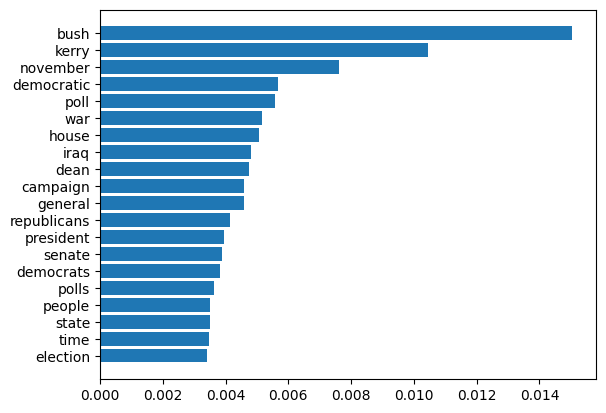

In [285]:
word_freq = word_counts / no_words
top_20_ids = np.argsort(word_freq)[-20:]
top_20_freq = word_freq[top_20_ids]
top_20_words = [word[0] for word in V[top_20_ids, 0]]
plt.barh(top_20_words, top_20_freq)
plt.show()

# Exercise D

In [285]:
K = 20  # number of clusters
alpha = 10  # parameter of the Dirichlet over mixture components
gamma = .1  # parameter of the Dirichlet over words
perplexity, swk = BMM(A, B, K, alpha, gamma)